In [1]:
#Import API
from dora.api import DataExplorer

import pandas as pd
from datetime import date, timedelta, datetime
from matplotlib import pyplot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from uszipcode import ZipcodeSearchEngine
import numpy as np

import random
import time
from sklearn.model_selection import KFold
import json
import sys

explorer = DataExplorer()

In [2]:
!ls demo_clustering_cluster_accuracy.npy

demo_clustering_cluster_accuracy.npy


In [3]:
!ls demo_clustering_cluster_coverage.npy

demo_clustering_cluster_coverage.npy


In [6]:
%matplotlib inline

In [7]:
import pandas as pd

In [8]:
demo_accuracy = np.load('demo_clustering_cluster_accuracy.npy')
demo_accuracy

array([(25000, 1000, 0, '2017-12-02_08:13:37'),
       (0, 3942, 0.50174419194252873), (1, 25000, 0.60334380782771202),
       (2, 2951, 0.50081336521433839), (3, 25000, 0.6135879715791106),
       (4, 13826, 0.58983711017545182), (5, 24292, 0.61268067323706699),
       (6, 25000, 0.6175698397549525), (7, 9708, 0.56996479279581325)], dtype=object)

In [18]:
rows = []
for d in demo_accuracy[1:]:
    cluster,size,accuracy = d
    rows.append({'cluster':cluster,'size':size,'accuracy':accuracy})
    
accuracy_df = pd.DataFrame(rows, columns=['cluster','size','accuracy'])

In [47]:
acc_df = accuracy_df[['cluster','accuracy']].groupby('cluster').aggregate(np.sum)
acc_df.reset_index(inplace=True)

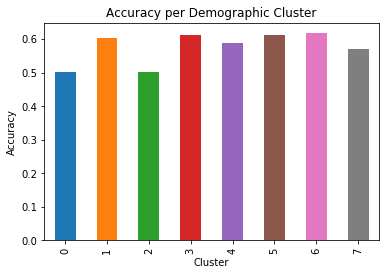

In [64]:
acc_plot = acc_df['accuracy'].plot(kind='bar',title='Accuracy per Demographic Cluster')
acc_plot.set_xlabel("Cluster")
acc_plot.set_ylabel("Accuracy");

In [28]:
demo_coverage = np.load('demo_clustering_cluster_coverage.npy')
demo_coverage

array([(25000, 1000, 0, '2017-12-02_08:13:46'),
       (0, 3942, 0.093884711779448626), (1, 25000, 0.17501253132832081),
       (2, 2951, 0.0612781954887218), (3, 25000, 0.18837092731829572),
       (4, 13826, 0.12977443609022554), (5, 24292, 0.18080200501253135),
       (6, 25000, 0.18228070175438596), (7, 9708, 0.12228070175438596)], dtype=object)

In [29]:
rows = []
for d in demo_coverage[1:]:
    cluster,size,coverage = d
    rows.append({'cluster':cluster,'size':size,'coverage':coverage})
    
coverage_df = pd.DataFrame(rows, columns=['cluster','size','coverage'])

In [65]:
cov_df = coverage_df[['cluster','coverage']].groupby('cluster').aggregate(np.sum)
cov_df.reset_index(inplace=True)

In [118]:
cov_df

,cluster,coverage
0,0,0.093885
1,1,0.175013
2,2,0.061278
3,3,0.188371
4,4,0.129774
5,5,0.180802
6,6,0.182281
7,7,0.122281


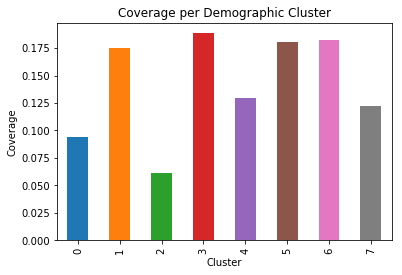

In [67]:
cov_plot = cov_df['coverage'].plot(kind='bar',title='Coverage per Demographic Cluster')
cov_plot.set_xlabel('Cluster')
cov_plot.set_ylabel('Coverage');

In [79]:
!ls demo_results_big.npy

demo_results_big.npy


In [94]:
demo_rg_acc = np.load('demo_results_big.npy')

In [114]:
rows = []
for x in demo_rg_acc[1:]:
    z = [float(y.decode('utf-8')) for y in x]
    rows.append(z)

In [115]:
demo_rg_df = pd.DataFrame(rows,columns=['regions','gender','size','accuracy'])
demo_rg_df

,regions,gender,size,accuracy
0,0.0,1.0,25000.0,0.616750
1,0.0,2.0,25000.0,0.588872
2,0.0,0.0,25000.0,0.602922
3,1.0,1.0,7924.0,0.585676
4,1.0,2.0,6579.0,0.533123
5,1.0,0.0,15758.0,0.598592
6,2.0,1.0,25000.0,0.652283
7,2.0,2.0,25000.0,0.618038
8,2.0,0.0,25000.0,0.635447
9,3.0,1.0,6837.0,0.544120


In [123]:
def chart_region(gender,label):
    df_demo_rg = demo_rg_df[demo_rg_df['gender']==gender][['regions','accuracy']].groupby('regions').aggregate(np.sum)
    df_demo_rg.reset_index(inplace=True)
    df_demo_plot = df_demo_rg['accuracy'].plot(kind='bar',title="Accuracy per Demographic by Regions ({0})".format(label))
    df_demo_plot.set_xlabel('Region')
    df_demo_plot.set_ylabel('Accuracy');

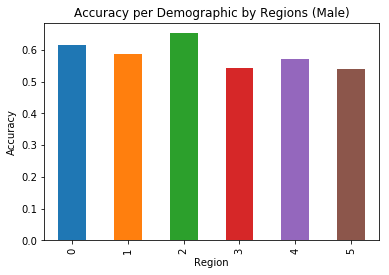

In [124]:
chart_region(1.0,'Male')

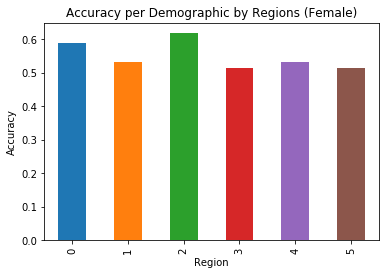

In [125]:
chart_region(2.0,'Female')

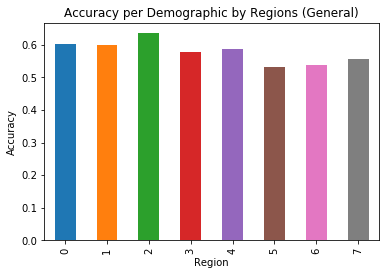

In [127]:
chart_region(0.0,'General')